<a href="https://colab.research.google.com/github/Daichi0517/gasyori/blob/main/FILES/image012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

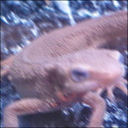

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

# 画像の読み込み
img = cv2.imread('imori.jpg')

# 処理
def processing(img):
    H, W, C = img.shape
    K = np.diag([1] * 3).astype(float)
    K /= 3
    # ゼロパディング
    pad = 3 // 2
    out = np.zeros((H + pad * 2, W + pad * 2, C), dtype=float)
    out[pad:pad + H, pad:pad + W] = img.copy().astype(float)
    tmp = out.copy()
    # フィルタリング
    for h in range(H):
        for w in range(W):
            for c in range(C):
                out[pad + h, pad + w, c] = np.sum(K * tmp[h:h + 3, w:w + 3, c])
    out = out[pad:pad + H, pad:pad + W].astype(np.uint8)
    return out

img12 = processing(img)
# 画像の表示
cv2_imshow(img12)
cv2.waitKey(0)
cv2.destroyAllWindows()
